# GMU ECE 527 - Computer Exercise #1
**Stewart Schuler - 20240831**

First Load in Datasets

In [31]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

# Load Digits Data set
from sklearn.datasets import load_digits
digits = load_digits()
images=digits.images
X_digits=digits.data
y_digits=digits.target 

# Load in MNIST Dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')
# Extract features and labels
X_mnist, y_mnist = mnist["data"], mnist["target"]
# Convert the DataFrame to a NumPy array
X_mnist = X_mnist.to_numpy()
y_mnist = y_mnist.astype(int)

64


## Exercise 1.1

#### Question for Discussion:
Question:\
If the goal is to randomly generate new digits, which approach is preferable:\
(a) Estimate p(x) from the entire dataset and then randomly select samples from this density, or\
(b) Estimate p(x|y = k) for each digit, and then select an integer k at random and draw a sample\
from p(x|y = k)?
If it does not make any difference which approach is used, explain why.\

Answer:\
Both methods are equally preferable as demonstrated by the following experiments.\
This is the case because when KDE is used it generates a density function for **X** and **X** is a specific value within the 
high dementional feature space. Therefore a random sample of a specific value of **X** will contain all the features (I.E. pixels) 
for that sample. Since we would expect KDE over the entire dataset to produce 10 distince high probability regions the sampled **X**
will be near one of those regions, and the resulting generated data will be similar to the trained data from that specific region's *k* value.\
Applying approach (b) will likewise produce a reasonable generated sample. But in that case there would only be one region of high probability corresponding
to the *k* value. 



**Experiment for case (a) - Using MNIST**\
Generated data looks good.

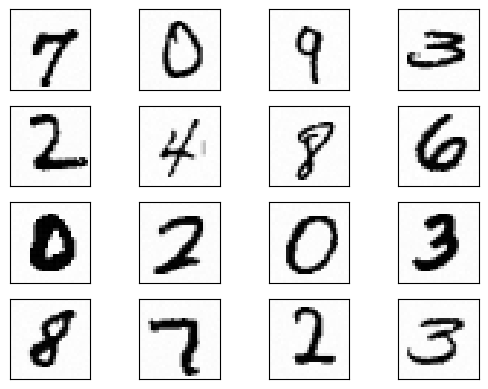

In [28]:
kde = KernelDensity().fit(X_mnist)
new_data = kde.sample(16)

# turn data into a 4x4 grid
new_data = new_data.reshape((4, 4, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(4):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')

**Experiment for case (b) - Using MNIST**\
For arbitrary values of k=4, Generated data looks good.

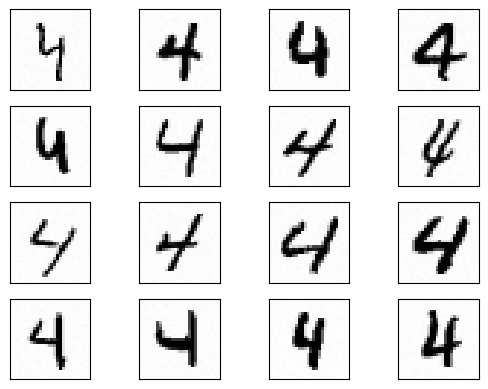

In [27]:
k = 4
kde = KernelDensity().fit(X_mnist[np.where(y_mnist==k)])
new_data = kde.sample(16)
.
# turn data into a 4x4 grid
new_data = new_data.reshape((4, 4, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(4):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')

#### Question for Discussion:
Question:\
(a) For the images in the digits dataset, the pixel values have 17 different grayscale values.
If the 64-dimensional feature space is partitioned into 64-dimensional unit cubes, with 17
bins for each feature, how many cubes (bins) will there be?\
(b) Repeat for the MNIST dataset where there are 256 different grayscale values and the
dimension of the feature space is 784.\
(c) Most of the d-dimensional feature space of pixels do not correspond to handwritten digits.
Some may just look like random noise such as the image on the left in the figure below
while others may be of some other object as shown on the right.
Discuss the importance of reducing the dimension of the feature space, i.e., is the curse
of dimensionality a serious issue for this problem? If so, speculate on what a reasonable
dimension might be.\

Answer:\
(a) The number of hypercubes can be determined using the following equation.
$$
    Hcubes = bins*features
$$
$$
    Hcubes = 17*64 = 1,088
$$

(b) Using the equation from (a).
$$
    Hcubes = 256*784 = 200,704
$$

(c) Reducing the dimension of the feature space reduces the number of data points needed to model the *Density Function*. The *curse of dimensionality* is an issue for this problem because the two datasets have 64 & 728 dimensions 
but both datasets have *Density Functions* which should be modeling only 10 classes - one for each digit. One would think that at absolute minimum to generate 10 seperable class regions the datasets would need to be at minimum
10 dimentions. Both datasets are well over the minimal number of dimentions which could mean an excess amount of data is needed to estiamte the *Density Function*.

#### Experiments:
(a) Beginning with bandwidth=1 and k=d/2, generate a set of 40 images by sampling the
KDE of the image dataset.


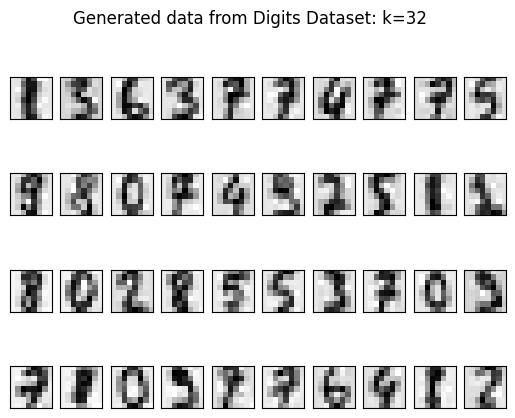

In [68]:
# Case Digits Dataset
bandwidth = 1
d = 64
k = int(d/2)

pca = PCA(k)
X_pc = pca.fit_transform(X_digits) # Reduce dimentionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from Digits Dataset: k={k}")
plt.show()

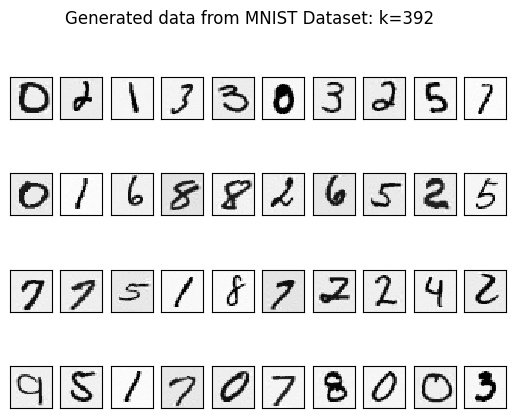

In [69]:
# Case MNIST Dataset
bandwidth = 1
d = 784
k = int(d/2)

pca = PCA(k)
X_pc = pca.fit_transform(X_mnist) # Reduce dimentionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from MNIST Dataset: k={k}")
plt.show()

(b) Make a plot of explained_variance_ and determine what you think would be a good
number to use for the dimension of the reduced feature space, and use this number in a
principal components analysis of the dataset, and then generate a kernel density estimate
of the data and generate 40 digits by sampling the KDE.

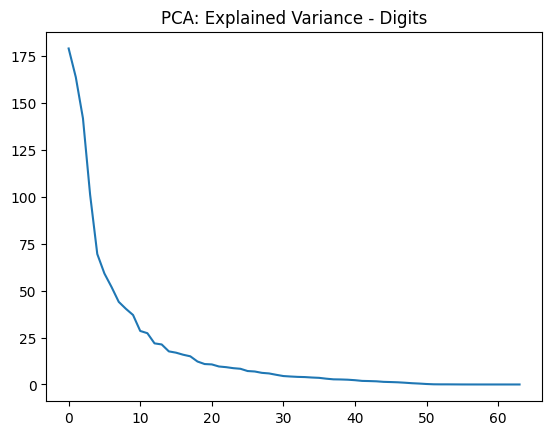

In [58]:
pca = PCA()
data = pca.fit_transform(X_digits)
v = pca.explained_variance_
plt.plot(v)
plt.title("PCA: Explained Variance - Digits") 
plt.show()

From above plot a princial compoenents value of 10 is chosen.

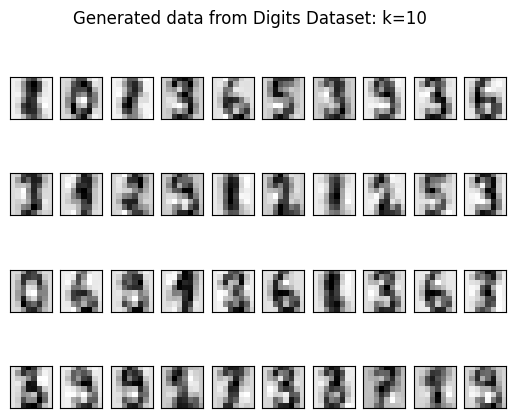

In [64]:
# Case Digits Dataset
bandwidth = 1
principal_components = 10
pca = PCA(principal_components)
X_pc = pca.fit_transform(X_digits) # Reduce dimentionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from Digits Dataset: k={principal_components}")
plt.show()

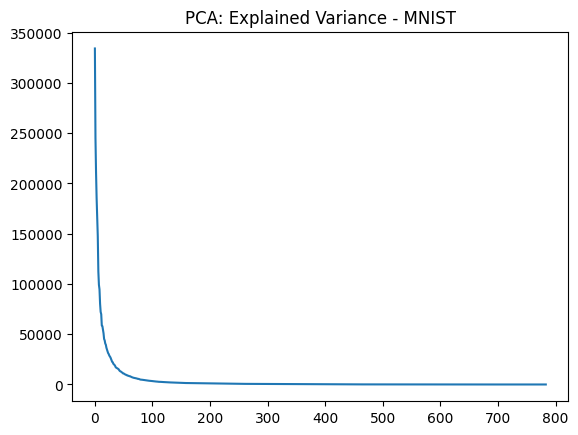

In [59]:
pca = PCA()
data = pca.fit_transform(X_mnist)
v = pca.explained_variance_
plt.plot(v)
plt.title("PCA: Explained Variance - MNIST") 
plt.show()

In [ ]:
From above plot a princial compoenents value of 30 is chosen.

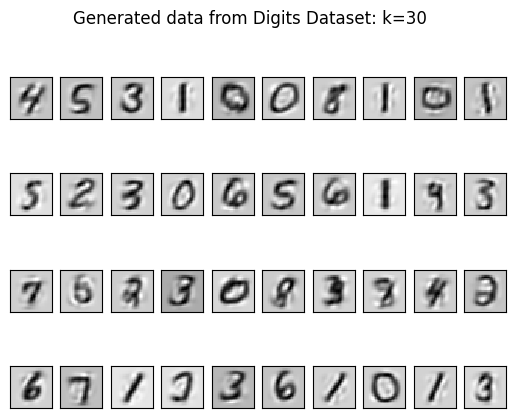

In [72]:
# Case Digits Dataset
bandwidth = 1
principal_components = 30
pca = PCA(principal_components)
X_pc = pca.fit_transform(X_mnist) # Reduce dimentionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from Digits Dataset: k={principal_components}")
plt.show()

(c) Discuss what you found in part (b). Are the images of high quality? What kind of
distortions do you observe?\

In both generated cases all digits are visually distinguishable. This would imply the by drastically reducing the dimentionality using PCA the number of remaining principal components is enough to model the 10 digits in a separable way.\
In the case of the MNIST dataset the images have a darker background. My intuition is this is because of the features we are throwing out most model the low variance white background near the edges which is generally the same across all 10 digits.
This can be further seen by looking at the background *near* the digits, these pixels are generally lighter than the edges becuase these pixel are used by other digits even if not being used by the generated specific digit. Thus their information 
is captured because it is needed to generate different digits. That information being captured manifests as the whiter background - truer to the training dataset.\
For the Digits dataset since there are less low variance white space pixels in the source images the explained variance curve has less low contribution values meaning a smaller percentage of the dimentions can be reduced compared to the MNIST. The generated Digits images are generally fuzzier around the edges of the writing when compared to the digits generated with more principaled components, but they look closer to those generated by $pc = k/2$ than the MNIST dataset does.